First, we import pandas and set two options we learnt about last week.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
%matplotlib inline

# 2. Pandas advanced

### Documentation

Check out the ```read_csv()``` documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

There are many other functions to read different file formats as Pandas dataframes:
- ```read_excel()``` https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
- ```read_sql()``` https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html
- ```read_sas()``` https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sas.html

and many more. They are all working in a similar way. Just check out the Pandas documentation:
https://pandas.pydata.org/pandas-docs/stable/reference/io.html

### Bad lines

Sometimes files you want to read are formatted in a bad way. This may prevent you from reading it (Pandas will show you errors). You may skip these lines by passing a ```error_bad_lines=False``` like that:  ```read_csv(filepath, sep=",", error_bad_lines=False)```

### Separators 

Not all files are separated by ```,```. Oftetimes tabs, semicolons or even whitespaces are used. Sometimes its crazy stuff like ```:::```.
Just pass the separator as a string to the Pandas ```read_csv(filepath, sep=",")``` function. Here are some important special symbols you may want to use:

- tab: ```\t```
- newline: ```\n```

So if you want to read a file that is tab delimited, pass ```read_csv(filepath, sep="\t")```.

### Importing large files

If you read data from your hard drive to a Pandas dataframe, your computer's memory (RAM) needs to be large enough to hold all of that data. Sometimes you may want to work with data files that are larger than your memory. There are several ways to deal with that issue.

First, we can use the ```nrows=``` parameter to read only a certain number of lines from the top of the file we are loading. 

In [2]:
pd.read_csv("../data/times_university_data.csv", sep=",", nrows=2)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011


We may also load only certain columns by passing a list with their names.

In [3]:
pd.read_csv("../data/times_university_data.csv", sep=",", nrows=2, usecols=["world_rank", "university_name"])

,world_rank,university_name
0,1,Harvard University
1,2,California Institute of Technology


Lastly there is a way to read files in small chunks by passing the ```chunksize=``` parameter and the number of lines each chunk should contain, for example ```read_csv(filepath, sep=",", chunksize=1000)```. However this will not directly return a single dataframe, but an object ```pandas.io.parsers.TextFileReader``` that is ready to read you file chunk by chunk.

In [15]:
chunks = pd.read_csv("../data/times_university_data.csv", sep=",", chunksize=1000)
chunks

We can either call ```.get_chunk()``` on this reader to retrieve chunk after chunk...

In [16]:
chunks.get_chunk()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,351-400,University of Texas at San Antonio,United States of America,17.3,28.6,17.6,66.2,32.2,-,"27,520",26.9,6%,48 : 52,2013
996,351-400,"University of the Andes, Colombia",Colombia,15.5,53.0,11.4,68.2,28.4,-,"15,773",16.9,2%,44 : 56,2013
997,351-400,University of Valencia,Spain,17.2,40.8,14.5,62.8,32.5,-,"58,413",15.4,9%,60 : 40,2013
998,351-400,University of Vigo,Spain,19.4,26.9,9.5,63.7,36.6,-,"22,793",19.0,3%,51 : 49,2013


... or, we use a for loop to read the file chunk by chunk.

In [17]:
for chunk in chunks:
    print(chunk[["world_rank", "university_name"]].head(1))
    print("############")

     world_rank        university_name
1000    351-400  University of Wyoming
############
     world_rank       university_name
2000        198  University of Trento
############


### Format columns

Last week we had this issue that some columns in our university ranking data were not properly formatted. The columns "international", "income", "total_score", and "num_students" should be numbers (float or integer), but they are objects (text).

In [19]:
df = pd.read_csv("../data/times_university_data.csv", sep=",")
print(df.dtypes)
df.head(2)

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011


Because of that we cannot do basic mathematical operations on these columns because these cannot handle the text values that cannot be casted to float. Python will show us an error like this:
```
TypeError: unsupported operand type(s) for /: 'str' and 'float'
```

It will work on a column with float datatype.

In [26]:
df["teaching"] / 10

0       9.97
1       9.77
2       9.78
3       9.83
4       9.09
        ... 
2598    1.86
2599    1.45
2600    2.40
2601    2.01
2602    1.62
Name: teaching, Length: 2603, dtype: float64

But not on one with datatype "object".

In [20]:
df["international"] / 10.0

TypeError: unsupported operand type(s) for /: 'str' and 'float'

Python will raise the same "TypeError" when we do something like this. 

In [21]:
"ten" / 2

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Let's use Pandas ```to_numeric()``` function to transfer the column to numeric. This time the error message is more helpful, because it tells us that it cannot parse string ```-``` at postion (line) 16. 

In [23]:
pd.to_numeric(df["international"])

ValueError: Unable to parse string "-" at position 16

Let's have a look at that line with position 16 by using the ```.loc``` method on our dataframe and passing the location we are looking for as an index in squared brackets ```[16]```.

In [13]:
df.loc[16]

world_rank                                   17
university_name           University of Toronto
country                                  Canada
teaching                                   75.8
international                                 -
research                                   87.9
citations                                  82.2
income                                        -
total_score                                82.0
num_students                             66,198
student_staff_ratio                        19.5
international_students                      15%
female_male_ratio                           NaN
year                                       2011
Name: 16, dtype: object

Maybe there are more ```-``` in the "international" column (Python stops when the first error occurs which was at position 16 and will only show this first error).

In [24]:
df[df["international"] == "-"]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
16,17,University of Toronto,Canada,75.8,-,87.9,82.2,-,82.0,"66,198",19.5,15%,NaN,2011
43,43,Karolinska Institute,Sweden,65.8,-,72.7,62.3,73.3,67.0,"7,774",11.5,22%,70 : 30,2011
49,49,University of Science and Technology of China,China,57.5,-,48.6,92.7,30.3,66.0,"14,290",7.9,2%,NaN,2011
92,93,McMaster University,Canada,44.7,-,58.7,68.5,-,57.6,"23,823",19.3,15%,53 : 47,2011
128,129,Stockholm University,Sweden,36.9,-,49.2,75.9,31.7,54.0,"31,715",23.7,8%,62 : 38,2011
130,130,University of Victoria,Canada,32.9,-,48.3,79.1,27.4,53.4,"17,581",21.5,11%,56 : 44,2011
137,138,University of Montreal,Canada,56.1,-,49.4,51.9,-,52.4,"38,264",20.3,25%,57 : 43,2011
172,173,Bielefeld University,Germany,39.9,-,35.7,70.4,-,49.3,"21,428",67.8,8%,57 : 43,2011
199,199,Swedish University of Agricultural Sciences,Sweden,43.3,-,49.5,41.7,99.9,46.2,"3,879",4.6,NaN,67 : 33,2011


Now we have several options to get rid of these ```-``` which the creators of the dataset have used instead of inserting proper "NaN" (nulls) for missing values.
First, we may use Pandas ```to_numeric()``` function and pass the ```errors="coerce"``` parameter to tell it to return "NaN" values for data that cannot be transfered to numeric.

In [27]:
pd.to_numeric(df["international"], errors="coerce")

0       72.4
1       54.6
2       82.3
3       29.5
4       70.3
        ... 
2598    24.3
2599    14.9
2600    16.1
2601    23.3
2602    17.7
Name: international, Length: 2603, dtype: float64

Let's overwrite the original column with a numeric copy. After this step, the datatype of the "international" column should have changed to float.

In [28]:
df["international"] = pd.to_numeric(df["international"], errors="coerce")
df.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

Now mathematical operations are possible.

In [29]:
df["international"] / 10.0

0       7.24
1       5.46
2       8.23
3       2.95
4       7.03
        ... 
2598    2.43
2599    1.49
2600    1.61
2601    2.33
2602    1.77
Name: international, Length: 2603, dtype: float64

### Use of the ```apply()``` method

The ```apply()``` method can be used to apply any kind of function while iterating through the observations in a dataframe.

Let's say we want to replace the ```-``` values in the "income" column with a random number based on the distribution of the "income" values in our dataset.

Let's first have a look at the income distribution of our dataset. For that we (again) use ```pd.to_numeric(errors="coerce")``` to transfer the values in the "income" column to numeric while replacing values that cannot be transferred to NaNs.

In [30]:
income_distribution = pd.to_numeric(df["income"], errors="coerce")

<AxesSubplot:ylabel='Frequency'>

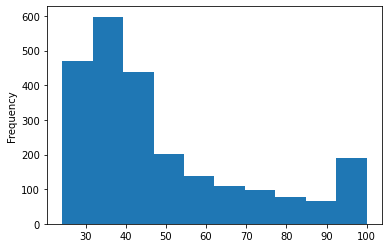

In [31]:
income_distribution.plot(kind="hist")

The mean is 48.97 and the standard deviation is 21.7 as we can see using the ```describe()``` method we learned about last week.

In [20]:
income_distribution.describe()

count    2385.000000
mean       48.979874
std        21.179938
min        24.200000
25%        33.000000
50%        41.000000
75%        59.000000
max       100.000000
Name: income, dtype: float64

We can use these parameters to define a normal distribution just for demonstration purposes. For that we use the numpy Python package which includes a lot of scientific computing stuff. 

Let's import numpy and use the ```random.normal()``` function to generate 100 random numbers using a normal distribution defined by the mean and standard deviation from the observed income distribution of our dataset.

In [46]:
import numpy as np

random_values = np.random.normal(income_distribution.mean(), income_distribution.std(), size=100)
random_values

array([75.84912137, 52.91867504, 53.07220046, 37.5872951 , 60.65956689,
       52.67347021, 71.42255029, 54.55939273, 58.21707122, 32.9106382 ,
       93.53556615, 48.8739031 , 62.89726751, 52.05900622, 86.70555146,
       64.35095401, 62.10939578, 38.64745366, 39.8540706 , 55.21547028,
       29.83989937, 40.74983748, 43.45475574, 35.54191415, 57.35427337,
       75.79420989, 78.62298331, 88.66785712, 70.49964508, 71.84328833,
       41.12651534, 48.99637984, 46.38648683, 79.13725733, 53.80349489,
       63.60755125, 44.45670586, 23.6668718 , 50.21816795, 35.42437253,
       39.80140615, 38.50952959, 55.41871503,  4.89667789, 51.76986992,
       59.2437858 , 62.81343537, 37.46757986, 23.36637152, 38.99915032,
       53.60716143, 96.79429804, 12.51721948, 33.31259665, 41.98129956,
       25.19811207, 48.27704717, 40.79080485, 55.36872839, 54.8206133 ,
       50.53915893, 51.35482842, 19.18562697, 10.84138626, 31.57106091,
       49.7646422 , 21.29114438,  9.88373202, 85.39131578, 65.83

We can also plot these numbers by transferring them to a Pandas Series.

<AxesSubplot:ylabel='Frequency'>

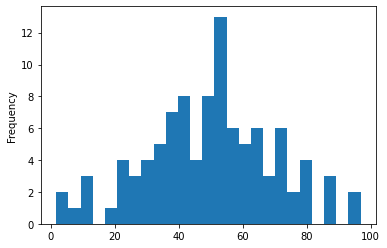

In [47]:
pd.Series(random_values).plot(kind="hist", bins=25)

To draw a single observation from the distribution, we pass ```size=1``` to the function and use indexing ```[0]``` to get the first element from the returned list (remember, Python starts counting indexes at 0 and not at 1).

In [48]:
np.random.normal(income_distribution.mean(), income_distribution.std(), size=1)[0]

55.603030733226674

Okay, now let us use the ```apply()``` function on the "income" column. The ```lambda x:``` tells Python to create a temporary variable x for each observation in the "income" column. Now we can draw a single number from our normal distribution and relace x if x equals ```-```, otherwise we just return x (the temporary variable which holds the original value of the current observation from "income").

In [51]:
mean = income_distribution.mean()
std = income_distribution.std()

print(df.loc[4])
df["income"] = df["income"].apply(lambda x: np.random.normal(mean, std, size=1)[0] if x == "-" else x)
print("----------------------------------------")
print(df.loc[4])

world_rank                                       5
university_name               Princeton University
country                   United States of America
teaching                                      90.9
international                                 70.3
research                                      95.4
citations                                     99.9
income                                           -
total_score                                   94.2
num_students                                 7,929
student_staff_ratio                            8.4
international_students                         27%
female_male_ratio                          45 : 55
year                                          2011
Name: 4, dtype: object
----------------------------------------
world_rank                                       5
university_name               Princeton University
country                   United States of America
teaching                                      90.9
international     

After this operation, "income" will still be an object column.

In [52]:
df.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

But now all values contained in "income" should be transferable to numeric without any problems.

In [53]:
df["income"] = pd.to_numeric(df["income"], errors="coerce")

In [54]:
df.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

### replace()

Another option is to use the ```replace()``` method, if you know exactly what values you want to replace with another specific value.

In [55]:
df["country_renamed"] = df["country"].replace({"United States of America": "USA", "United Kingdom": "UK", "Germany": "Deutschland"})

In [56]:
df.head(2)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,country_renamed
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011,USA
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011,USA


# 3. Seaborn

We will now use the Python package Seaborn, which is based on the very popular matplotlib libary. Seaborn provides a high-level interface for drawing attractive and informative statistical graphics. Check out the seaborn gallery for some awesome examples:

In [58]:
from IPython.display import IFrame

display(IFrame("https://seaborn.pydata.org/examples/index.html", width=800, height=400))

First install seaborn using pip.

```pip install seaborn```

Import seaborn

In [59]:
import seaborn as sns

It is very easy to use seaborn functions to plot something because we can just pass our dataframe:

<AxesSubplot:xlabel='income', ylabel='student_staff_ratio'>

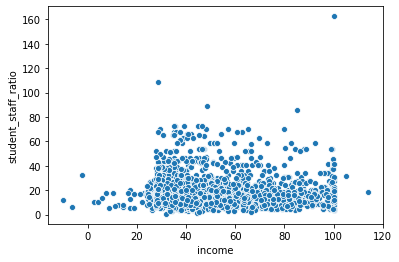

In [60]:
sns.scatterplot(x="income", y="student_staff_ratio", data=df)

There is also another way to create seaborn (and matplot) plots that give us more control over the indiviual elements of the plot. First we create an empty figure with one or more subplots. For that we need the matplot libary which runs "under the hood" of seaborn.

In [61]:
import matplotlib.pyplot as plt

Now we can create emtpy plots.

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:>)

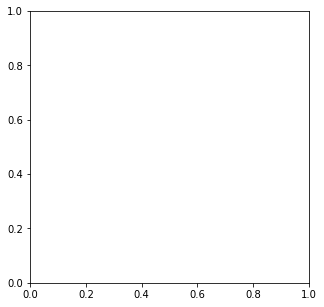

In [62]:
plt.subplots(1, figsize=(5, 5))

One row with two subplots.

(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

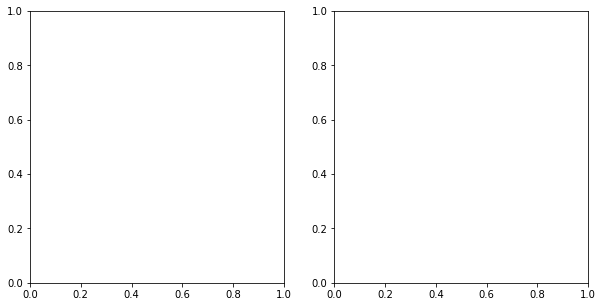

In [63]:
plt.subplots(1, 2, figsize=(10, 5))

Two rows with two sublots.

(<Figure size 360x360 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

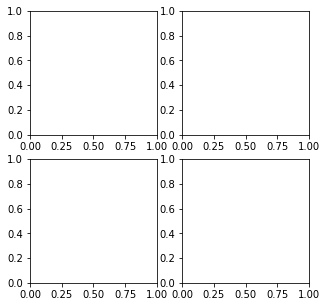

In [64]:
plt.subplots(2, 2, figsize=(5, 5))

The ```subplot()``` function returns two objects (one "figure" object and a number of "axis" objects). Let's assign these to two variables.

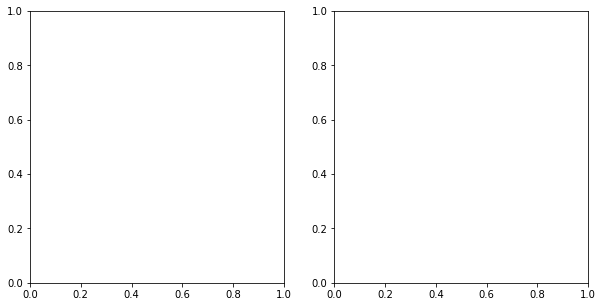

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

We can now fill these empty subplots with seaborn plots by passing the axes object togehter with an index (remember Python starts counting with 0, so when we want to reference the first axis, we pass ```[0]```).

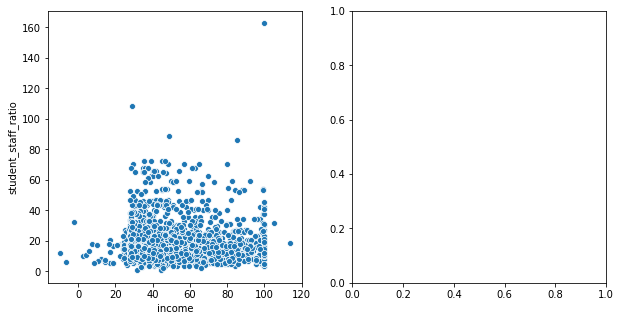

In [73]:
sns.scatterplot(x="income", y="student_staff_ratio", data=df, ax=axes[0])
fig

Let's fill the second subplot with a histogram of the "year" column. The seaborn ```distplot()``` takes as input the column, we want to plot.

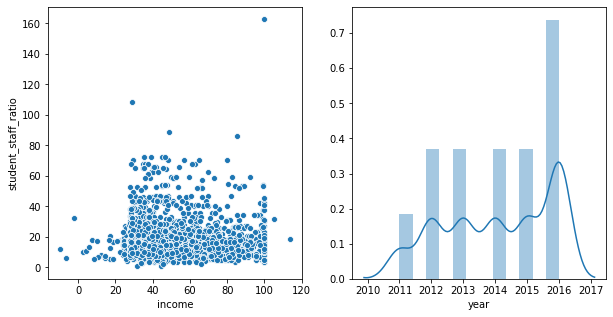

In [74]:
sns.distplot(df["year"], ax=axes[1])
fig

Let's get rid of that kernel density estimate and tell the function to use a number of bins that correspond to the number of years present in our dataset. Check out the documentation for more options: 

https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot

In [75]:
df["year"].nunique()

6

When you overwrite a subplot, make sure to ```clear()``` the axis and the contained plot you previously put there (otherwise the new content will overlap the old content).

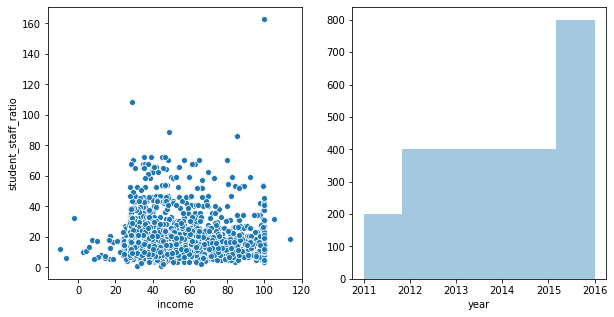

In [76]:
axes[1].clear()
sns.distplot(df["year"], ax=axes[1], kde=False, bins=6)
fig

We can also control the elements of the subplots.

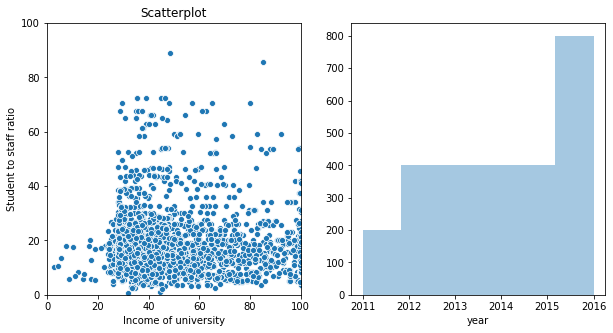

In [77]:
axes[0].set_xlabel("Income of university")
axes[0].set_ylabel("Student to staff ratio")
axes[0].set_xlim(0,100)
axes[0].set_ylim(0,100)
axes[0].set_title("Scatterplot")
fig

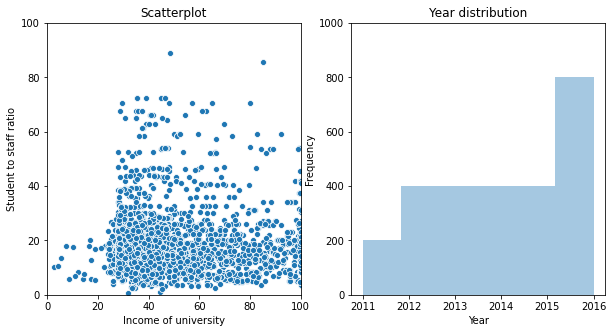

In [78]:
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Frequency")
axes[1].set_ylim(0,1000)
axes[1].set_title("Year distribution")
fig

Usually you want to do put all the plot related code into a single cell. But first let's select and prepare some data.

In [79]:
# get ivy league universities
ivy = df[df["university_name"].isin(["Harvard University", "Stanford University", "Massachusetts Institute of Technology"])]
# world rank to numeric
ivy["world_rank"] = pd.to_numeric(ivy["world_rank"])
# change uni names
ivy["university_name"] = ivy["university_name"].replace({"Harvard University": "Harvard", "Stanford University": "Stanford", "Massachusetts Institute of Technology": "MIT"})
# clean and cast international_student and num_students
ivy["international_students"] = pd.to_numeric(ivy["international_students"].apply(lambda x: x.replace("%", "")))
ivy["num_students"] = pd.to_numeric(ivy["num_students"].apply(lambda x: x.replace(",", "")))

First we set some general styling options.
Also check out the seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html

In [80]:
sns.set(font_scale=1.2)
sns.set_style("ticks")

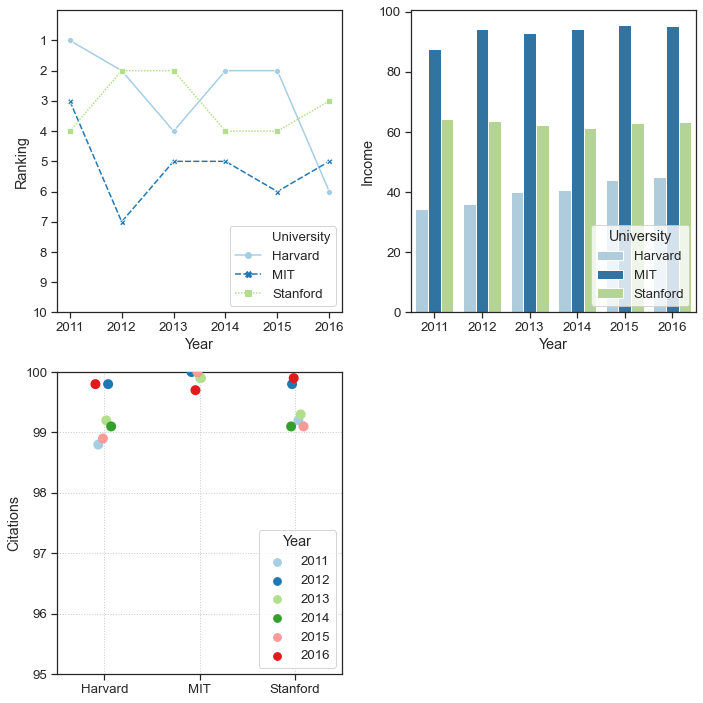

In [81]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

# Ranking plot axis [0,0] first row, first column
ranking = sns.lineplot(x="year", y="world_rank", hue="university_name", style="university_name", data=ivy, markers=True, palette="Paired",ax=axes[0,0])

ranking.set_ylim(0,10)
ranking.set_yticks([1,2,3,4,5,6,7,8,9,10])
ranking.set_ylabel("Ranking")
ranking.invert_yaxis()
ranking.set_xlabel("Year")
ranking.legend(loc=4).texts[0].set_text("University")

# Income plot axis [0,1] first row, second column
income = sns.barplot(x="year", y="income", hue="university_name", data=ivy, palette="Paired", ax=axes[0,1])
income.set_xlabel("Year")
income.set_ylabel("Income")
income.legend(loc=4).set_title("University")

# Citations plot axis [1,0] second row, first column
citations = sns.stripplot(x="university_name", y="citations", hue="year", palette="Paired", data=ivy, size=10, ax=axes[1,0])
citations.set_ylabel("Citations")
citations.set_xlabel("")
citations.set_ylim(95.0,100)
citations.legend(loc=4).set_title("Year")
citations.grid(linestyle="dotted")

# Remove last subplot [1,1] second row, second column
fig.delaxes(axes[1,1])

# Final adjustments
fig.tight_layout() #tidy up the figure 
plt.savefig("my_nice_plot.png", dpi=150) #save the figure

Documentation legend: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html